In [ ]:
import sys
from pathlib import Path

# Set the path to your local optics codebase
optics_path = str(Path.home() / "labdata/users/Oakley/GitHub/optics")
if optics_path not in sys.path:
    sys.path.append(optics_path)

from optics_predictions import run_optics_predictions

# Input FASTA: deduplicated, combined rhodopsin sequences
fasta_file = "../data/combined_deduped.fa"
results_dir = "../results/optics"

# Run OPTICS predictions with options matching the CLI help
optics_df, optics_pred_file = run_optics_predictions(
    input_sequence=fasta_file,
    pred_dir=results_dir,                           # --output_dir
    output="optics_predictions",                    # --prediction_prefix
    model="type-one",                               # --model
    encoding_method="aa_prop",                      # --encoding
    blastp=False,                                   # --blastp
    iden_report="blastp_report.txt",                # --blastp_report
    refseq="bovine",                                # --refseq
    bootstrap=False                                 # --bootstrap
)

print(f"OPTICS predictions saved to: {optics_pred_file}")
optics_df.head()

Processing Sequences: 100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓| 313/313 [01:35<00:00,  3.26seqs/s]


Error: Cached prediction file can't be saved...

XLR_Gloeobacter_violaceus_BAIT_BAC88139.1_gll0198_[Gloeobacter_violaceus_PCC_7421]	539.0	-	298

CYANO150__Cyanophyceae__UniRef90_A0A2W7ARY7	538.9	-	297

CYANO150__unclassified_Leptolyngbyaceae__UniRef90_A0A969FEC7	538.5	-	297

CYANO150__Chamaesiphon_sp__UniRef90_UPI0035946169	543.2	-	367

CYANO150__Chamaesiphon_sp__UniRef90_UPI003592F9D2	538.1	-	304

CYANO150__Leptolyngbya_sp_Heron_Island_J__UniRef90_U9W0I1	541.7	-	282

CYANO150__Cyanophyceae__UniRef90_A0A8J7JTD9	544.0	-	269

CYANO150__Leptolyngbyaceae_cyanobacterium_JSC_12__UniRef90_K8GTY7	538.7	-	262

CYANO150__Halothece_sp__UniRef90_K9YEI2	543.6	-	281

CYANO150__Leptolyngbya_sp_LCM1_Bin17__UniRef90_A0A6H2NHV9	540.0	-	276

CYANO150__Symploca_sp_SIO2G7__UniRef90_A0A845YHD9	538.7	-	265

CYANO150__Deinococcus__UniRef90_A0A172TD44	545.0	-	285

CYANO150__Deinococcus_sp__UniRef90_UPI0025F8D0E5	534.1	-	259

CYANO150__Allomeiothermus_silvanus__UniRef90_UPI0023F38943	541.4	-	258

CYANO150__True

,Names,Single_Prediction,%Identity_Nearest_VPOD_Sequence,Sequence_Length,Lmax_Hex_Color
0,XLR_Gloeobacter_violaceus_BAIT_BAC88139.1_gll0...,539.0,-,298,#7eff00
1,CYANO150__Cyanophyceae__UniRef90_A0A2W7ARY7,538.9,-,297,#7eff00
2,CYANO150__unclassified_Leptolyngbyaceae__UniRe...,538.5,-,297,#7cff00
3,CYANO150__Chamaesiphon_sp__UniRef90_UPI0035946169,543.2,-,367,#8cff00
4,CYANO150__Chamaesiphon_sp__UniRef90_UPI003592F9D2,538.1,-,304,#7bff00


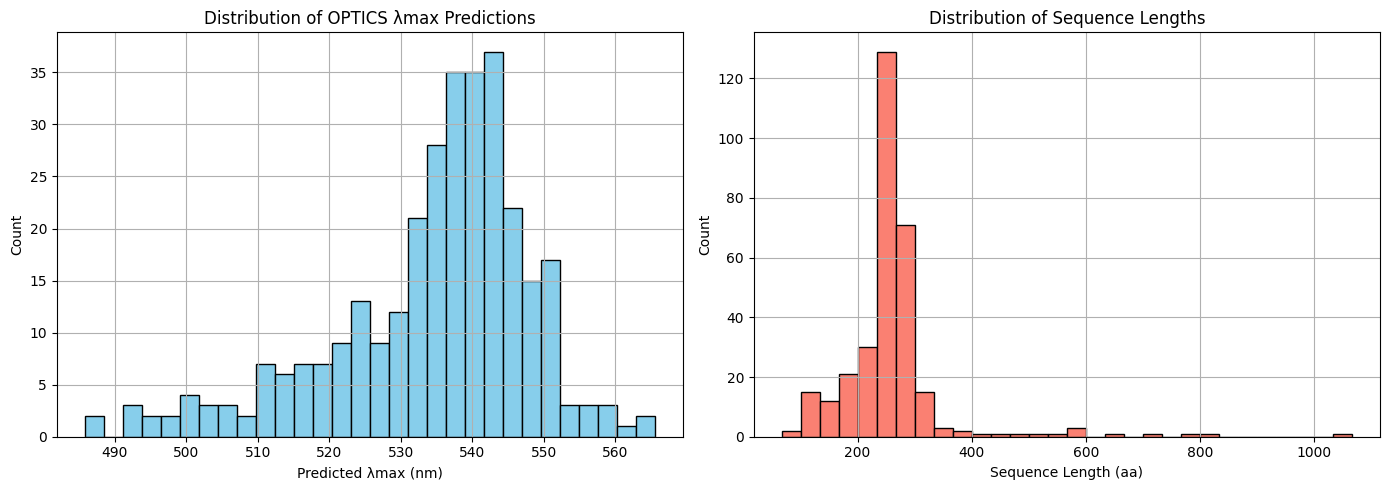

In [8]:
#Plot histograms for sequence length and OPTICS predictions of lambda-max 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the OPTICS results TSV
optics_tsv = "../results/optics/optics_on_optics_predictions_2025-08-28_22-04-07/optics_predictions_predictions.tsv"
df = pd.read_csv(optics_tsv, sep="\t")

# Plot histograms of lambda-max predictions and sequence length
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for lambda-max predictions
df["Single_Prediction"].hist(bins=30, color="skyblue", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("Predicted λmax (nm)")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of OPTICS λmax Predictions")

# Histogram for sequence length
df["Sequence_Length"].hist(bins=30, color="salmon", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Sequence Length (aa)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Sequence Lengths")

plt.tight_layout()
plt.show()